---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

Cost Item Purchased   Name
Store 1  22.5         Sponge  Chris
Store 1   2.5   Kitty Litter  Kevyn
Store 2   5.0          Spoon  Filip

In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

Cost Item Purchased   Name        Date
Store 1  22.5         Sponge  Chris  December 1
Store 1   2.5   Kitty Litter  Kevyn   January 1
Store 2   5.0          Spoon  Filip     mid-May

In [3]:
df['Delivered'] = True
df

Cost Item Purchased   Name        Date  Delivered
Store 1  22.5         Sponge  Chris  December 1       True
Store 1   2.5   Kitty Litter  Kevyn   January 1       True
Store 2   5.0          Spoon  Filip     mid-May       True

In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

Cost Item Purchased   Name        Date  Delivered  Feedback
Store 1  22.5         Sponge  Chris  December 1       True  Positive
Store 1   2.5   Kitty Litter  Kevyn   January 1       True      None
Store 2   5.0          Spoon  Filip     mid-May       True  Negative

In [5]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

index  Cost Item Purchased   Name        Date  Delivered  Feedback
0  Store 1  22.5         Sponge  Chris  December 1       True  Positive
1  Store 1   2.5   Kitty Litter  Kevyn         NaN       True      None
2  Store 2   5.0          Spoon  Filip     mid-May       True  Negative

In [7]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [8]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

Role       School
Name                              
James          Grader     Business
Kelly  Director of HR          NaN
Mike              NaN          Law
Sally  Course liasion  Engineering

In [9]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

Role       School
Name                              
Sally  Course liasion  Engineering
James          Grader     Business

In [10]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

Role       School
Name                              
Kelly  Director of HR          NaN
Sally  Course liasion  Engineering
James          Grader     Business

In [11]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

Role       School
Name                              
James          Grader     Business
Mike              NaN          Law
Sally  Course liasion  Engineering

In [12]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

Name            Role       School
0  Kelly  Director of HR          NaN
1  Sally  Course liasion  Engineering
2  James          Grader     Business

In [13]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

Location_x   Name            Role            Location_y       School
0       State Street  Kelly  Director of HR                   NaN          NaN
1  Washington Avenue  Sally  Course liasion   512 Wilson Crescent  Engineering
2  Washington Avenue  James          Grader  1024 Billiard Avenue     Business

In [14]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

First Name Last Name            Role       School
0      Sally    Brooks  Course liasion  Engineering

# Idiomatic Pandas: Making Code Pandorable

In [15]:
import pandas as pd
df = pd.read_csv('census.csv')
df

SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME             CTYNAME  \
0         40       3         6      1       0    Alabama             Alabama   
1         50       3         6      1       1    Alabama      Autauga County   
2         50       3         6      1       3    Alabama      Baldwin County   
3         50       3         6      1       5    Alabama      Barbour County   
4         50       3         6      1       7    Alabama         Bibb County   
5         50       3         6      1       9    Alabama       Blount County   
6         50       3         6      1      11    Alabama      Bullock County   
7         50       3         6      1      13    Alabama       Butler County   
8         50       3         6      1      15    Alabama      Calhoun County   
9         50       3         6      1      17    Alabama     Chambers County   
10        50       3         6      1      19    Alabama     Cherokee County   
11        50       3         6      1      21    Alabama      Chilton County   
12        50       3         6      1      23    Alabama      Choctaw County   
13        50       3         6      1      25    Alabama       Clarke County   
14        50       3         6      1      27    Alabama         Clay County   
15        50       3         6      1      29    Alabama     Cleburne County   
16        50       3         6      1      31    Alabama       Coffee County   
17        50       3         6      1      33    Alabama      Colbert County   
18        50       3         6      1      35    Alabama      Conecuh County   
19        50       3         6      1      37    Alabama        Coosa County   
20        50       3         6      1      39    Alabama    Covington County   
21        50       3         6      1      41    Alabama     Crenshaw County   
22        50       3         6      1      43    Alabama      Cullman County   
23        50       3         6      1      45    Alabama         Dale County   
24        50       3         6      1      47    Alabama       Dallas County   
25        50       3         6      1      49    Alabama       DeKalb County   
26        50       3         6      1      51    Alabama       Elmore County   
27        50       3         6      1      53    Alabama     Escambia County   
28        50       3         6      1      55    Alabama       Etowah County   
29        50       3         6      1      57    Alabama      Fayette County   
...      ...     ...       ...    ...     ...        ...                 ...   
3163      50       2         3     55     131  Wisconsin   Washington County   
3164      50       2         3     55     133  Wisconsin     Waukesha County   
3165      50       2         3     55     135  Wisconsin      Waupaca County   
3166      50       2         3     55     137  Wisconsin     Waushara County   
3167      50       2         3     55     139  Wisconsin    Winnebago County   
3168      50       2         3     55     141  Wisconsin         Wood County   
3169      40       4         8     56       0    Wyoming             Wyoming   
3170      50       4         8     56       1    Wyoming       Albany County   
3171      50       4         8     56       3    Wyoming     Big Horn County   
3172      50       4         8     56       5    Wyoming     Campbell County   
3173      50       4         8     56       7    Wyoming       Carbon County   
3174      50       4         8     56       9    Wyoming     Converse County   
3175      50       4         8     56      11    Wyoming        Crook County   
3176      50       4         8     56      13    Wyoming      Fremont County   
3177      50       4         8     56      15    Wyoming       Goshen County   
3178      50       4         8     56      17    Wyoming  Hot Springs County   
3179      50       4         8     56      19    Wyoming      Johnson County   
3180      50       4         8     56      21    Wyoming      Laramie County   
3181  

In [16]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [17]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [18]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [19]:
df.apply(min_max, axis=1)

max       min
STNAME    CTYNAME                               
Alabama   Autauga County       55347.0   54660.0
          Baldwin County      203709.0  183193.0
          Barbour County       27341.0   26489.0
          Bibb County          22861.0   22512.0
          Blount County        57776.0   57373.0
          Bullock County       10887.0   10606.0
          Butler County        20944.0   20154.0
          Calhoun County      118437.0  115620.0
          Chambers County      34153.0   33993.0
          Cherokee County      26084.0   25859.0
          Chilton County       43943.0   43665.0
          Choctaw County       13841.0   13170.0
          Clarke County        25767.0   24675.0
          Clay County          13880.0   13456.0
          Cleburne County      15072.0   14921.0
          Coffee County        51211.0   50177.0
          Colbert County       54514.0   54354.0
          Conecuh County       13208.0   12662.0
          Coosa County         11758.0   10724.0
          Covington County     38060.0   37796.0
          Crenshaw County      13963.0   13853.0
          Cullman County       82005.0   80374.0
          Dale County          50358.0   49501.0
          Dallas County        43803.0   41131.0
          DeKalb County        71387.0   70869.0
          Elmore County        81468.0   79465.0
          Escambia County      38309.0   37784.0
          Etowah County       104442.0  103057.0
          Fayette County       17231.0   16759.0
          Franklin County      31734.0   31507.0
...                                ...       ...
Wisconsin Washburn County      15930.0   15552.0
          Washington County   133674.0  131967.0
          Waukesha County     396488.0  390076.0
          Waupaca County       52422.0   51945.0
          Waushara County      24581.0   24033.0
          Winnebago County    169639.0  167059.0
          Wood County          74807.0   73435.0
Wyoming   Albany County        37956.0   36428.0
          Big Horn County      12022.0   11672.0
          Campbell County      49220.0   46244.0
          Carbon County        15856.0   15559.0
          Converse County      14343.0   13728.0
          Crook County          7444.0    7114.0
          Fremont County       41129.0   40222.0
          Goshen County        13666.0   13383.0
          Hot Springs County    4846.0    4741.0
          Johnson County        8636.0    8552.0
          Laramie County       97121.0   92271.0
          Lincoln County       18722.0   17943.0
          Natrona County       82178.0   75472.0
          Niobrara County       2548.0    2475.0
          Park County          29237.0   28259.0
          Platte County         8812.0    8678.0
          Sheridan County      30020.0   29146.0
          Sublette County      10418.0    9899.0
          Sweetwater County    45162.0   43593.0
          Teton County         23125.0   21297.0
          Uinta County         21102.0   20822.0
          Washakie County       8545.0    8316.0
          Weston County         7234.0    7065.0

[3142 rows x 2 columns]

In [20]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [ ]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

# Group by

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

SUMLEV  REGION  DIVISION  STATE  COUNTY     STNAME             CTYNAME  \
1         50       3         6      1       1    Alabama      Autauga County   
2         50       3         6      1       3    Alabama      Baldwin County   
3         50       3         6      1       5    Alabama      Barbour County   
4         50       3         6      1       7    Alabama         Bibb County   
5         50       3         6      1       9    Alabama       Blount County   
6         50       3         6      1      11    Alabama      Bullock County   
7         50       3         6      1      13    Alabama       Butler County   
8         50       3         6      1      15    Alabama      Calhoun County   
9         50       3         6      1      17    Alabama     Chambers County   
10        50       3         6      1      19    Alabama     Cherokee County   
11        50       3         6      1      21    Alabama      Chilton County   
12        50       3         6      1      23    Alabama      Choctaw County   
13        50       3         6      1      25    Alabama       Clarke County   
14        50       3         6      1      27    Alabama         Clay County   
15        50       3         6      1      29    Alabama     Cleburne County   
16        50       3         6      1      31    Alabama       Coffee County   
17        50       3         6      1      33    Alabama      Colbert County   
18        50       3         6      1      35    Alabama      Conecuh County   
19        50       3         6      1      37    Alabama        Coosa County   
20        50       3         6      1      39    Alabama    Covington County   
21        50       3         6      1      41    Alabama     Crenshaw County   
22        50       3         6      1      43    Alabama      Cullman County   
23        50       3         6      1      45    Alabama         Dale County   
24        50       3         6      1      47    Alabama       Dallas County   
25        50       3         6      1      49    Alabama       DeKalb County   
26        50       3         6      1      51    Alabama       Elmore County   
27        50       3         6      1      53    Alabama     Escambia County   
28        50       3         6      1      55    Alabama       Etowah County   
29        50       3         6      1      57    Alabama      Fayette County   
30        50       3         6      1      59    Alabama     Franklin County   
...      ...     ...       ...    ...     ...        ...                 ...   
3162      50       2         3     55     129  Wisconsin     Washburn County   
3163      50       2         3     55     131  Wisconsin   Washington County   
3164      50       2         3     55     133  Wisconsin     Waukesha County   
3165      50       2         3     55     135  Wisconsin      Waupaca County   
3166      50       2         3     55     137  Wisconsin     Waushara County   
3167      50       2         3     55     139  Wisconsin    Winnebago County   
3168      50       2         3     55     141  Wisconsin         Wood County   
3170      50       4         8     56       1    Wyoming       Albany County   
3171      50       4         8     56       3    Wyoming     Big Horn County   
3172      50       4         8     56       5    Wyoming     Campbell County   
3173      50       4         8     56       7    Wyoming       Carbon County   
3174      50       4         8     56       9    Wyoming     Converse County   
3175      50       4         8     56      11    Wyoming        Crook County   
3176      50       4         8     56      13    Wyoming      Fremont County   
3177      50       4         8     56      15    Wyoming       Goshen County   
3178      50       4         8     56      17    Wyoming  Hot Springs County   
3179      50       4         8     56      19    Wyoming      Johnson County   
3180      50       4         8     56      21    Wyoming      Laramie County   
3181  

In [22]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in st

Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836


Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi ha

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
C

Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Lo

Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Count

Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in sta

Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Mont

Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counti

Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri h

Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Count

Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland 

In [ ]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

In [23]:
df.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME         CTYNAME  \
1      50       3         6      1       1  Alabama  Autauga County   
2      50       3         6      1       3  Alabama  Baldwin County   
3      50       3         6      1       5  Alabama  Barbour County   
4      50       3         6      1       7  Alabama     Bibb County   
5      50       3         6      1       9  Alabama   Blount County   

   CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010     ...       \
1          54571              54571            54660     ...        
2         182265             182265           183193     ...        
3          27457              27457            27341     ...        
4          22915              22919            22861     ...        
5          57322              57322            57373     ...        

   RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  \
1          7.242091         -2.915927         -3.012349          2.265971   
2         14.832960         17.647293         21.845705         19.243287   
3         -4.728132         -2.500690         -7.056824         -3.904217   
4         -5.527043         -5.068871         -6.201001         -0.177537   
5          1.807375         -1.177622         -1.748766         -2.062535   

   RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
1         -2.530799     7.606016    -2.626146    -2.722002     2.592270   
2         17.197872    15.844176    18.559627    22.727626    20.317142   
3        -10.543299    -4.874741    -2.758113    -7.167664    -3.978583   
4          0.177258    -5.088389    -4.363636    -5.403729     0.754533   
5         -1.369970     1.859511    -0.848580    -1.402476    -1.577232   

   RNETMIG2015  
1    -2.187333  
2    18.293499  
3   -10.543299  
4     1.107861  
5    -0.884411  

[5 rows x 100 columns]

In [24]:
df = df.set_index('STNAME')
# transform the groupby key
def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [ ]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [ ]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

In [ ]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

# Scales

In [25]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

Grades
excellent     A+
excellent      A
excellent     A-
good          B+
good           B
good          B-
ok            C+
ok             C
ok            C-
poor          D+
poor           D

In [26]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [27]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [28]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [29]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

/Users/Shawn_Ma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [ ]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [ ]:
df.head()

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

# Date Functionality in Pandas

In [2]:
import pandas as pd
import numpy as np

### Timestamp

In [30]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

In [31]:
stamp = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
type(stamp)

pandas._libs.tslib.Timestamp

In [77]:
start = dt.datetime(2011,1,1)
end = dt.datetime(2012,1,1)
pd.bdate_range(start,end) # business date range

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2011-12-19', '2011-12-20', '2011-12-21', '2011-12-22',
               '2011-12-23', '2011-12-26', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=260, freq='B')

In [86]:
pd.Timestamp('1970-1-1')

Timestamp('1970-01-01 00:00:00')

In [85]:
(pd.Timestamp(dt.date.today()) - pd.Timestamp('1970-1-1'))/ pd.Timedelta('1s')

1533427200.0

In [78]:
pd.date_range(start=start, periods=100, freq='M')

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
      

### Period

In [45]:
pd.Period('1/2016',freq='M')

Period('2016-01', 'M')

In [48]:
pd.Period('3/5/2016',freq='M')

Period('2016-03', 'M')

In [49]:
print pd.Period('3/5/2016',freq='M')

2016-03


In [35]:
pd.Period('4Q2005')

Period('2005Q4', 'Q-DEC')

In [36]:
pd.Period('2010-01')

Period('2010-01', 'M')

### DatetimeIndex

In [32]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [33]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [8]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [9]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [37]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

a   b
2 June 2013   44  67
Aug 29, 2014  78  54
2015-06-26    25  55
7/12/16       73  47

In [38]:
ts3.index

Index([u'2 June 2013', u'Aug 29, 2014', u'2015-06-26', u'7/12/16'], dtype='object')

In [39]:
ts3.index = pd.to_datetime(ts3.index)
ts3

a   b
2013-06-02  44  67
2014-08-29  78  54
2015-06-26  25  55
2016-07-12  73  47

In [40]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [41]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [44]:
import datetime as dt
dt.date(2016,9,3) - dt.date(2016,9,1)

datetime.timedelta(2)

In [50]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

In [54]:
pd.Timedelta(100,unit='m')

Timedelta('0 days 01:40:00')

In [55]:
pd.Timedelta('100m')

Timedelta('0 days 01:40:00')

In [56]:
start=pd.Timestamp('9/2/2016 8:00AM')
inc = pd.Timedelta('3H')
pd.date_range(start, periods=10,freq=inc)

DatetimeIndex(['2016-09-02 08:00:00', '2016-09-02 11:00:00',
               '2016-09-02 14:00:00', '2016-09-02 17:00:00',
               '2016-09-02 20:00:00', '2016-09-02 23:00:00',
               '2016-09-03 02:00:00', '2016-09-03 05:00:00',
               '2016-09-03 08:00:00', '2016-09-03 11:00:00'],
              dtype='datetime64[ns]', freq='3H')

### Working with Dates in a Dataframe

In [65]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [57]:
pd.date_range('2018-08-02', periods=9, freq='1W-SUN')

DatetimeIndex(['2018-08-05', '2018-08-12', '2018-08-19', '2018-08-26',
               '2018-09-02', '2018-09-09', '2018-09-16', '2018-09-23',
               '2018-09-30'],
              dtype='datetime64[ns]', freq='W-SUN')

In [66]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

Count 1  Count 2
2016-10-02      104      129
2016-10-16      108      122
2016-10-30      111      123
2016-11-13      109      117
2016-11-27      113      120
2016-12-11      121      118
2016-12-25      121      117
2017-01-08      120      125
2017-01-22      116      129

In [67]:
df.index.weekday_name

Index([u'Sunday', u'Sunday', u'Sunday', u'Sunday', u'Sunday', u'Sunday',
       u'Sunday', u'Sunday', u'Sunday'],
      dtype='object')

In [68]:
df.diff()

Count 1  Count 2
2016-10-02      NaN      NaN
2016-10-16      4.0     -7.0
2016-10-30      3.0      1.0
2016-11-13     -2.0     -6.0
2016-11-27      4.0      3.0
2016-12-11      8.0     -2.0
2016-12-25      0.0     -1.0
2017-01-08     -1.0      8.0
2017-01-22     -4.0      4.0

In [69]:
df.resample('M').mean()

Count 1     Count 2
2016-10-31  107.666667  124.666667
2016-11-30  111.000000  118.500000
2016-12-31  121.000000  117.500000
2017-01-31  118.000000  127.000000

In [70]:
df['2017']

Count 1  Count 2
2017-01-08      120      125
2017-01-22      116      129

In [71]:
df['2016-12']

Count 1  Count 2
2016-12-11      121      118
2016-12-25      121      117

In [75]:
df['2016-11':]

Count 1  Count 2
2016-11-13      109      117
2016-11-27      113      120
2016-12-11      121      118
2016-12-25      121      117
2017-01-08      120      125
2017-01-22      116      129

In [92]:
df.index

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

#### time-series related instance methods

In [93]:
df.shift(2, freq='BM').index

/Users/Shawn_Ma/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/datetimes.py:831: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


DatetimeIndex(['2016-11-30', '2016-11-30', '2016-11-30', '2016-12-30',
               '2016-12-30', '2017-01-31', '2017-01-31', '2017-02-28',
               '2017-02-28'],
              dtype='datetime64[ns]', freq=None)

In [99]:
import pandas.tseries.offsets as offsets
dr = pd.date_range('1/1/2010', periods=3, freq=3 * offsets.BDay())
ts = pd.Series(np.random.randn(3), index=dr)

In [105]:
ts.asfreq('B')

2010-01-01    1.507307
2010-01-04         NaN
2010-01-05         NaN
2010-01-06    1.895977
2010-01-07         NaN
2010-01-08         NaN
2010-01-11    0.079094
Freq: B, dtype: float64

In [108]:
df

Count 1  Count 2
2016-10-02      104      129
2016-10-16      108      122
2016-10-30      111      123
2016-11-13      109      117
2016-11-27      113      120
2016-12-11      121      118
2016-12-25      121      117
2017-01-08      120      125
2017-01-22      116      129

In [109]:
df.resample('M').sum()

Count 1  Count 2
2016-10-31      323      374
2016-11-30      222      237
2016-12-31      242      235
2017-01-31      236      254

In [73]:
df.asfreq('W', method='ffill')

Count 1  Count 2
2016-10-02      104      129
2016-10-09      104      129
2016-10-16      108      122
2016-10-23      108      122
2016-10-30      111      123
2016-11-06      111      123
2016-11-13      109      117
2016-11-20      109      117
2016-11-27      113      120
2016-12-04      113      120
2016-12-11      121      118
2016-12-18      121      118
2016-12-25      121      117
2017-01-01      121      117
2017-01-08      120      125
2017-01-15      120      125
2017-01-22      116      129

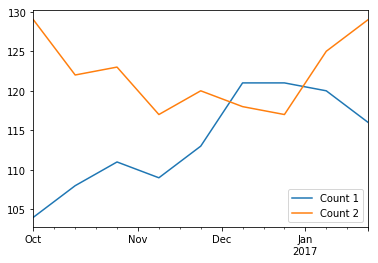

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()

In [111]:
rng = pd.date_range('2012/1/1', periods=100, freq='S') # seconds

In [113]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)

In [115]:
ts

2012-01-01 00:00:00    446
2012-01-01 00:00:01    324
2012-01-01 00:00:02    390
2012-01-01 00:00:03     36
2012-01-01 00:00:04    157
2012-01-01 00:00:05     58
2012-01-01 00:00:06    381
2012-01-01 00:00:07    228
2012-01-01 00:00:08    113
2012-01-01 00:00:09    455
2012-01-01 00:00:10    418
2012-01-01 00:00:11    409
2012-01-01 00:00:12    169
2012-01-01 00:00:13    202
2012-01-01 00:00:14    411
2012-01-01 00:00:15    392
2012-01-01 00:00:16    333
2012-01-01 00:00:17    378
2012-01-01 00:00:18     17
2012-01-01 00:00:19    361
2012-01-01 00:00:20    242
2012-01-01 00:00:21      7
2012-01-01 00:00:22    160
2012-01-01 00:00:23     96
2012-01-01 00:00:24    297
2012-01-01 00:00:25    199
2012-01-01 00:00:26     37
2012-01-01 00:00:27    270
2012-01-01 00:00:28    168
2012-01-01 00:00:29    118
                      ... 
2012-01-01 00:01:10     78
2012-01-01 00:01:11    165
2012-01-01 00:01:12      8
2012-01-01 00:01:13    499
2012-01-01 00:01:14    123
2012-01-01 00:01:15    418
2

In [137]:
ts.resample('1Min',label='right').mean()

2012-01-01 00:01:00    242.4
2012-01-01 00:02:00    225.7
Freq: T, dtype: float64

In [143]:
ts.resample('5Min',closed='right',label='right').mean()

2012-01-01 00:00:00    446.00000
2012-01-01 00:05:00    233.59596
Freq: 5T, dtype: float64

In [127]:
ts.resample('5Min',loffset='1s').mean()

2012-01-01 00:00:01    235.72
dtype: float64

In [126]:
ts.resample('1Min',label='left').mean()

2012-01-01 00:00:00    242.4
2012-01-01 00:01:00    225.7
Freq: T, dtype: float64

In [131]:
ts[:2].resample('250L').asfreq()

2012-01-01 00:00:00.000    446.0
2012-01-01 00:00:00.250      NaN
2012-01-01 00:00:00.500      NaN
2012-01-01 00:00:00.750      NaN
2012-01-01 00:00:01.000    324.0
Freq: 250L, dtype: float64

In [136]:
ts[:2].resample('250L').ffill()

2012-01-01 00:00:00.000    446
2012-01-01 00:00:00.250    446
2012-01-01 00:00:00.500    446
2012-01-01 00:00:00.750    446
2012-01-01 00:00:01.000    324
Freq: 250L, dtype: int64

In [135]:
ts[:2].resample('250L').ffill(limit=2)

2012-01-01 00:00:00.000    446.0
2012-01-01 00:00:00.250    446.0
2012-01-01 00:00:00.500    446.0
2012-01-01 00:00:00.750      NaN
2012-01-01 00:00:01.000    324.0
Freq: 250L, dtype: float64